<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/CAPM_Capital_Asset_Pricing_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPM - Capital Asset Pricing Model

In [3]:
!pip install yfinance -q
!pip install seaborn -q

In [7]:
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import datetime as dt

import urllib.request       # handle online files
import zipfile
import os

import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from pylab import mpl, plt

sns.set_theme()
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams["savefig.dpi"] = 500
np.set_printoptions(precision=5, suppress=True, formatter={"float": lambda x: f"{x:6.3f}"})

%matplotlib inline

In [ ]:
#help(stats.linregress)

In [8]:
import yfinance as yf
from requests import Session

# As a note: In your homework, as yfinance has updated resently, you will need to install and include the 'requests' package and use this session.headers line. You can just copy this for the homework and adjust the following
# Ticker -> TSLA | ['Adj Close'] -> ['Close] | These two updates, plus adjusting the dates, will allow the code to work.

session = Session()
session.headers.update({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}) # required for the moment unfortunately

data = yf.download('AAPL', start='2020-01-01', end='2021-01-01')['Close'] # without ['Close'] we can get OHLC + Volume data, we stick to close for now.
data.columns = ['Close']
data.index.name = 'Date'
display(data.tail())




YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close
Date,
2020-12-24,128.905823
2020-12-28,133.516220
2020-12-29,131.738480
2020-12-30,130.615143
2020-12-31,129.609085


In [11]:
def get_prices(tickers, freq_p, st_day, end_day):
    mystock = pd.DataFrame()
    for t in tickers:
        mystock[t] = yf.download(t, start=st_day, end=end_day, interval=freq_p)['Close']
    return mystock

In [12]:
tic=['TSLA', 'SPY']
prices= get_prices(tic, freq_p='1wk', st_day="2011-01-01", end_day="2022-05-31")  # id , 1wk, 1mo
print(prices)

prices.rename(columns={"TSLA": "Your_Stock", "SPY":"INDEX"}, inplace=True)

prices.info()
prices.tail(20)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  TSLA         SPY
Date                              
2011-01-01    1.882667   98.403893
2011-01-08    1.716667  100.075714
2011-01-15    1.536000   99.355858
2011-01-22    1.600667   98.852806
2011-01-29    1.564000  101.507523
...                ...         ...
2022-04-30  288.549988  394.886627
2022-05-07  256.529999  385.651489
2022-05-14  221.300003  374.045074
2022-05-21  253.210007  398.649872
2022-05-28  252.753326  396.413025

[596 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 596 entries, 2011-01-01 to 2022-05-28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Your_Stock  596 non-null    float64
 1   INDEX       596 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB


,Your_Stock,INDEX
Date,,
2022-01-15,314.633331,419.158905
2022-01-22,282.116669,422.958282
2022-01-29,307.773346,429.418274
2022-02-05,286.666656,421.532318
2022-02-12,285.660004,415.570068
2022-02-19,269.956665,418.938812
2022-02-26,279.429993,413.598602
2022-03-05,265.116669,402.018524
2022-03-12,301.796661,425.417908


In [13]:
print(prices.isnull().sum())
prices.dropna(how='any', inplace=True)
print(prices.isnull().sum())
prices.info()
print(prices)

Your_Stock    0
INDEX         0
dtype: int64
Your_Stock    0
INDEX         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 596 entries, 2011-01-01 to 2022-05-28
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Your_Stock  596 non-null    float64
 1   INDEX       596 non-null    float64
dtypes: float64(2)
memory usage: 14.0 KB
            Your_Stock       INDEX
Date                              
2011-01-01    1.882667   98.403893
2011-01-08    1.716667  100.075714
2011-01-15    1.536000   99.355858
2011-01-22    1.600667   98.852806
2011-01-29    1.564000  101.507523
...                ...         ...
2022-04-30  288.549988  394.886627
2022-05-07  256.529999  385.651489
2022-05-14  221.300003  374.045074
2022-05-21  253.210007  398.649872
2022-05-28  252.753326  396.413025

[596 rows x 2 columns]


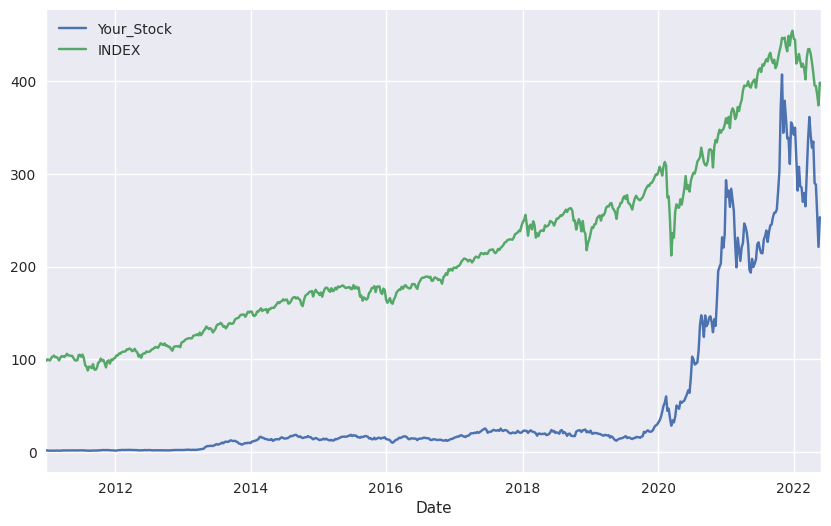

In [14]:
prices.plot(figsize=(10,6))
plt.legend()

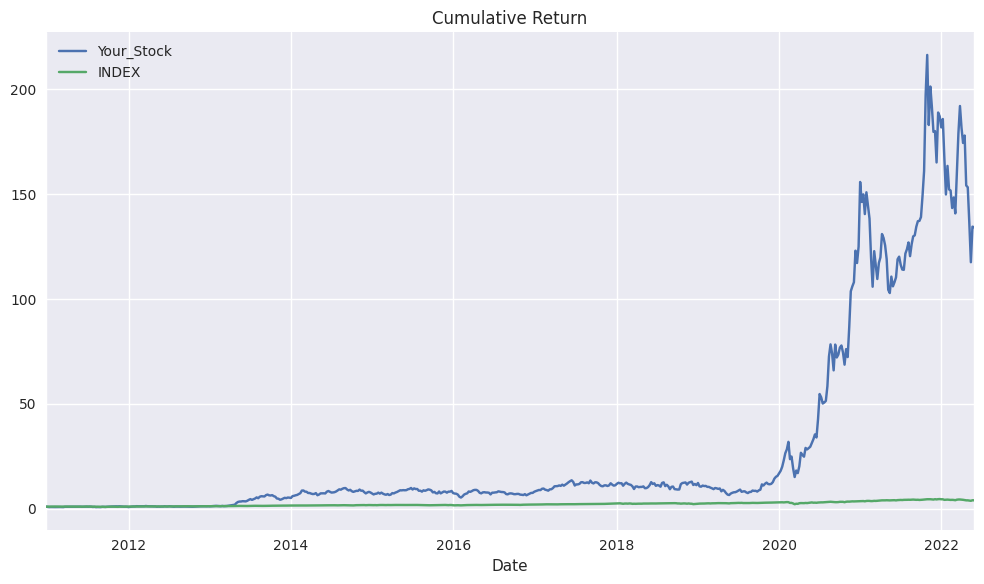

In [15]:
(prices / prices.iloc[0] * 1).plot(figsize=(10, 6), subplots=False)  #cumulative returns
plt.title('Cumulative Return')
plt.tight_layout()

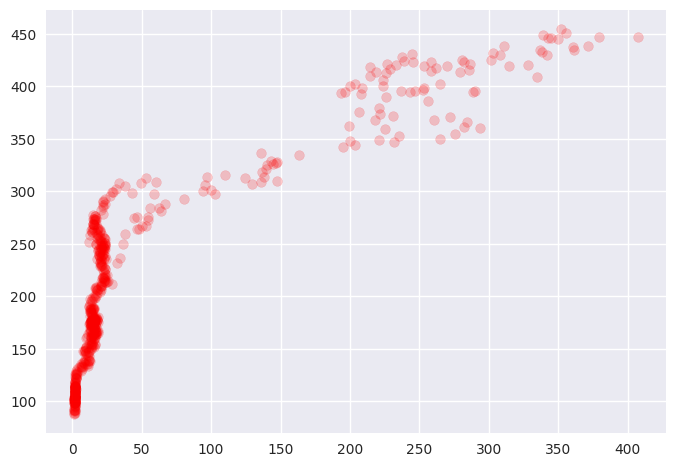

In [16]:
prices.pct_change(1).dropna()
plt.scatter(prices['Your_Stock'], prices['INDEX'], color = 'red', alpha=0.2)

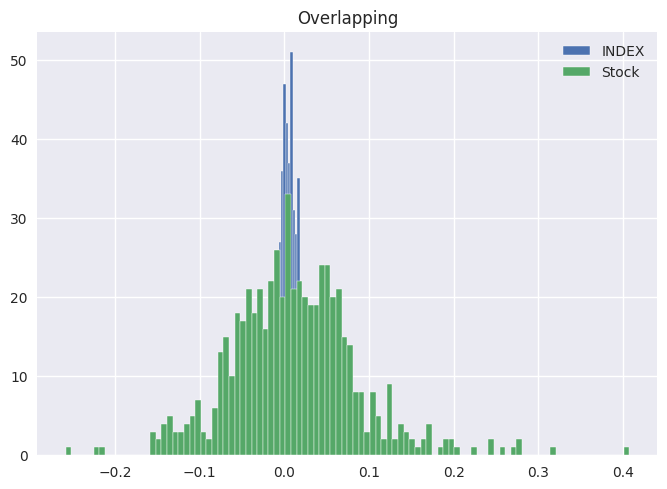

In [17]:
returns = prices.pct_change(1).dropna()

plt.hist(returns['INDEX'], label='INDEX', bins=100)
plt.hist(returns['Your_Stock'], label='Stock', bins=100)

plt.legend(loc='upper right')
plt.title('Overlapping')
plt.show()

In [18]:
returns

,Your_Stock,INDEX
Date,,
2011-01-08,-0.088173,0.016989
2011-01-15,-0.105243,-0.007193
2011-01-22,0.042101,-0.005063
2011-01-29,-0.022907,0.026855
2011-02-05,-0.008951,0.014945
...,...,...
2022-04-30,-0.005868,-0.001602
2022-05-07,-0.110969,-0.023387
2022-05-14,-0.137333,-0.030096


#using scipy

In [19]:
beta,alpha,r_value,p_value,std_err = stats.linregress(returns['INDEX'],returns["Your_Stock"])

In [20]:
print(beta.round(4))
print(alpha.round(4))
print(r_value.round(2))
print(p_value.round(4))

1.5397
0.0071
0.45
0.0


#using statsmodels

In [21]:
formula = 'Your_Stock ~ INDEX'
results = smf.ols(formula, returns).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Your_Stock   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     152.8
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           2.18e-31
Time:                        01:54:15   Log-Likelihood:                 756.72
No. Observations:                 595   AIC:                            -1509.
Df Residuals:                     593   BIC:                            -1501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0071      0.003      2.527      0.0

#using scikit-learn
You need to take a look at the shape of the data you are feeding into .fit().

Here x.shape = (10,) but we need it to be (10, 1), see sklearn. Same goes for y. So we reshape:

In [22]:

X = returns.loc[:, ['INDEX']].values

In [23]:
y = returns.loc[:, ['Your_Stock']].values

In [24]:
X.shape

(595, 1)

In [25]:
type(X)

numpy.ndarray

In [26]:
X.dtype

dtype('float64')

In [27]:
y.shape

(595, 1)

In [28]:
reg = LinearRegression(fit_intercept=True).fit(X,y)

In [29]:
reg.predict(X[0].reshape(-1,1))

array([[ 0.033]])

In [30]:
reg.predict(X[0:10])

array([[ 0.033],
       [-0.004],
       [-0.001],
       [ 0.048],
       [ 0.030],
       [ 0.024],
       [-0.018],
       [ 0.009],
       [-0.012],
       [-0.029]])

In [31]:
score = reg.score(X, y)
print(score)

0.20485698671882224


In [32]:
reg.coef_

array([[ 1.540]])

In [33]:
reg.intercept_

array([ 0.007])

In [34]:
m = reg.coef_[0,0]
b = reg.intercept_[0]

In [35]:
m

1.5397145958004974

In [36]:
b

0.007084847753096178

In [37]:
# following slope intercept form
print("formula: y = {:.4f}X + {:.4f}".format(m, b) )

formula: y = 1.5397X + 0.0071


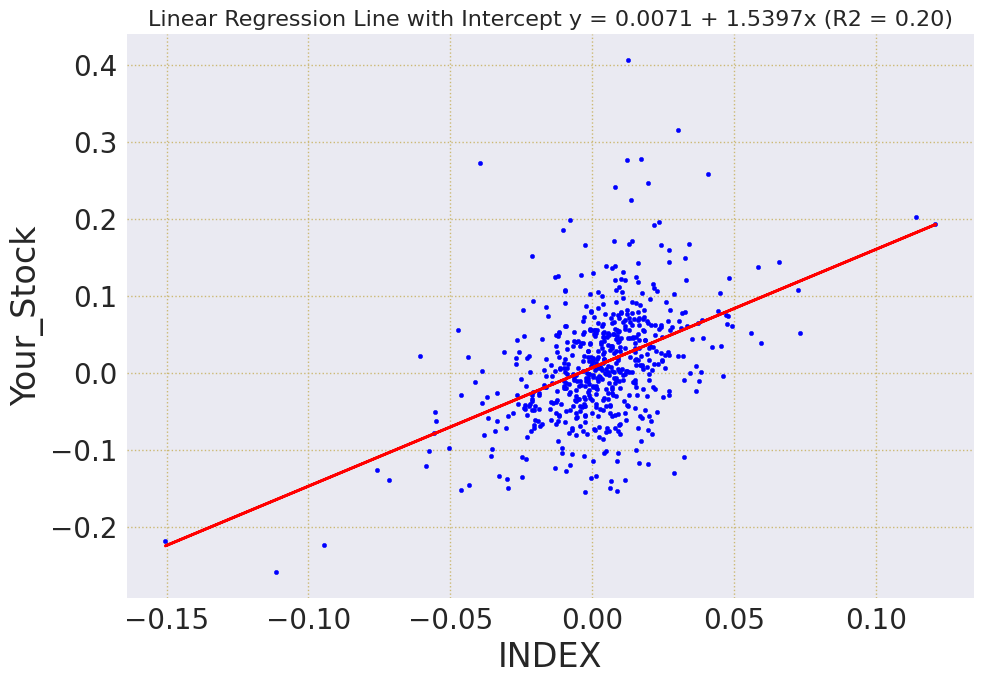

In [38]:
from numpy.ma.core import flatten_structured_array
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));

ax.scatter(X, y, color='blue', s=10);
ax.plot(X, reg.predict(X), color='red',linewidth=2);
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'y')
ax.tick_params(labelsize = 20)
ax.set_xlabel('INDEX', fontsize = 24)
ax.set_ylabel('Your_Stock', fontsize = 24)
ax.set_title("Linear Regression Line with Intercept y = {:.4f} + {:.4f}x (R2 = {:.2f})".format(b, m, score), fontsize = 16 )
fig.tight_layout()
#fig.savefig('images/linearregression', dpi = 300)